<a href="https://colab.research.google.com/github/brenngraham/ml_exploration/blob/main/MNIST_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MA 721 Homework 1 - Brennan Graham

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

## Import Dataset 1

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("labels for the first five examples: \n", y_train[0:5])

# convert index labels to one-hot encoding labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("one-hot labels for the first five examples: \n", y_train[0:5])

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
labels for the first five examples: 
 [5 0 4 1 9]
one-hot labels for the first five examples: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Visualizing the data

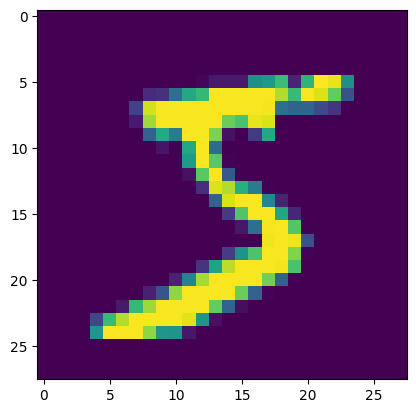

In [ ]:
plt.imshow(x_train[0,:,:])
plt.show()

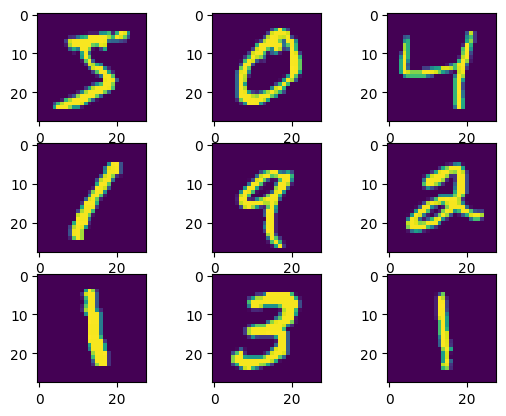

In [ ]:
fig, axes = plt.subplots(3,3)

counter = 0
for x in range(3):
  for y in range(3):
    axes[x,y].imshow(x_train[counter])
    counter += 1

plt.show()

## Define Model 1

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 1

Predicted label:  [[-0.32821804 -0.28221604 -0.3428135   0.11273192 -0.36962464 -0.21771517
   0.72086555 -0.11420187 -0.27552223  0.4429355 ]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (1, 784)                  0         
                                                                 
 dense_11 (Dense)            (1, 512)                  401920    
                                                                 
 dense_12 (Dense)            (1, 128)                  65664     
                                                                 
 dense_13 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


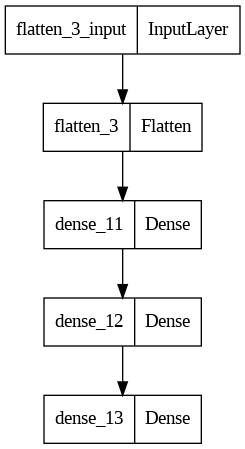

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the Network for Model 1

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.2614 - accuracy: 0.2226 - val_loss: 2.0561 - val_accuracy: 0.4983
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 1.8997 - accuracy: 0.6086 - val_loss: 1.6859 - val_accuracy: 0.7317
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 1.5545 - accuracy: 0.7244 - val_loss: 1.3477 - val_accuracy: 0.7927
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.2694 - accuracy: 0.7661 - val_loss: 1.0913 - val_accuracy: 0.8252
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.0651 - accuracy: 0.7936 - val_loss: 0.9144 - val_accuracy: 0.8460
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9243 - accuracy: 0.8134 - val_loss: 0.7924 - val_accuracy: 0.8633
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8255 - accuracy: 0.8286 - val_loss: 0.7063 - val_accuracy: 0.8728
Epoch 

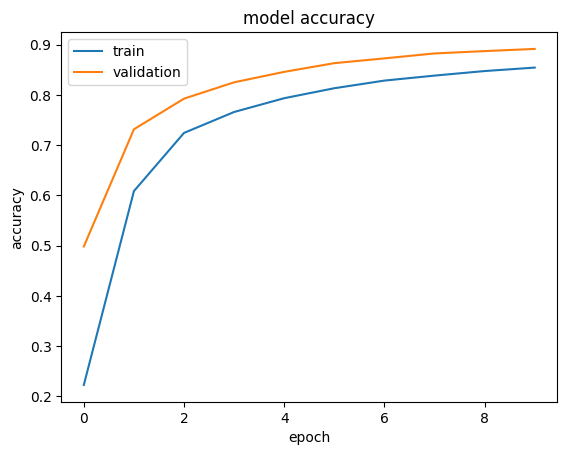

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Model 1

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.6049010157585144, 0.8683000206947327]

## Visualize Some Wrong Predictions

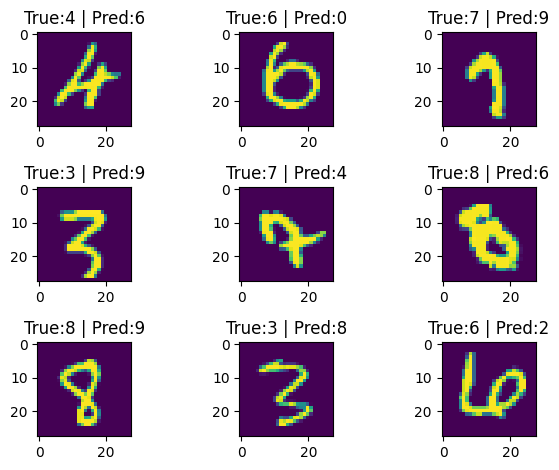

In [ ]:
# we explicitly compute the prediction on the test dataset
# and check those with wrong predictions.
y_pred = []
y_true = []
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test,  y_test))
test_dataset  = test_dataset.batch(32)

for images, labels in test_dataset:
  logits = model(images).numpy()
  predictions = np.argmax(logits, axis=-1)

  y_pred.extend(predictions)
  y_true.extend(labels.numpy())

# Visualize predictions that the model got wrong

y_pred = np.array(y_pred)
y_true = np.array(y_true)
wrong_idxs = np.nonzero(y_pred - y_true)[0]
wrong_idxs = np.random.choice(wrong_idxs, size=9) # select a subset

count = 0
fig, axes = plt.subplots(3,3)
for x in range(3):
  for y in range(3):
    wrong_idx = wrong_idxs[count]
    count += 1

    axes[x,y].imshow(x_test[wrong_idx])
    axes[x,y].set_title('True:%d | Pred:%d' % (y_true[wrong_idx],
                                               y_pred[wrong_idx]))

plt.tight_layout()
plt.show()

## Define Model 2

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 2

Predicted label:  [[ 0.18110003  0.2740749  -0.05098316 -0.09257853 -0.10595899 -0.09703499
  -0.18436627  0.30599135  0.37064177 -0.41569102]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (1, 784)                  0         
                                                                 
 dense_7 (Dense)             (1, 512)                  401920    
                                                                 
 dense_8 (Dense)             (1, 128)                  65664     
                                                                 
 dense_9 (Dense)             (1, 128)                  16512     
                                                                 
 dense_10 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

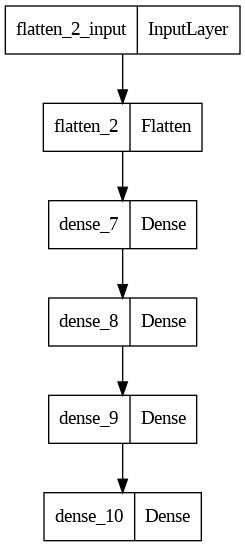

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network for Model 2

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.2834 - accuracy: 0.2418 - val_loss: 2.1779 - val_accuracy: 0.4160
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.0772 - accuracy: 0.5045 - val_loss: 1.9296 - val_accuracy: 0.6203
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 1.8048 - accuracy: 0.6413 - val_loss: 1.6129 - val_accuracy: 0.7105
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.4908 - accuracy: 0.7156 - val_loss: 1.2828 - val_accuracy: 0.7848
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 1.2001 - accuracy: 0.7728 - val_loss: 1.0112 - val_accuracy: 0.8385
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9802 - accuracy: 0.8116 - val_loss: 0.8215 - val_accuracy: 0.8610
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.8309 - accuracy: 0.8327 - val_loss: 0.6963 - val_accuracy: 0.8763
Epoch 

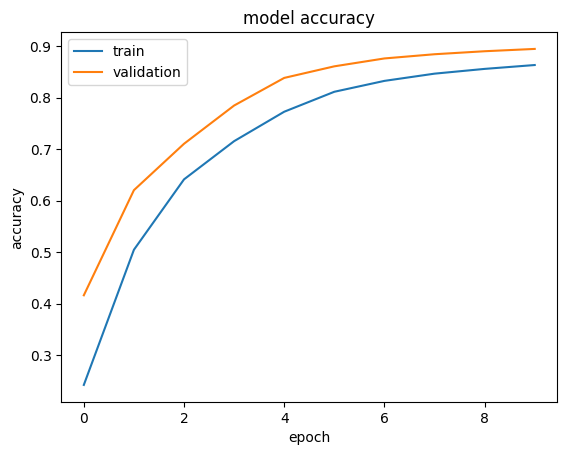

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 2 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.5641565918922424, 0.8754000067710876]

## Define Model 3

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 3

Predicted label:  [[-0.26777852  0.167921   -0.0569167   0.03103192  0.1174559   0.0282207
   0.02176747  0.11208093  0.2847622   0.09276883]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (1, 784)                  0         
                                                                 
 dense_14 (Dense)            (1, 512)                  401920    
                                                                 
 dense_15 (Dense)            (1, 128)                  65664     
                                                                 
 dense_16 (Dense)            (1, 128)                  16512     
                                                                 
 dense_17 (Dense)            (1, 128)                  16512     
                                                                 
 dense_18 (Dense)            (1, 10)       

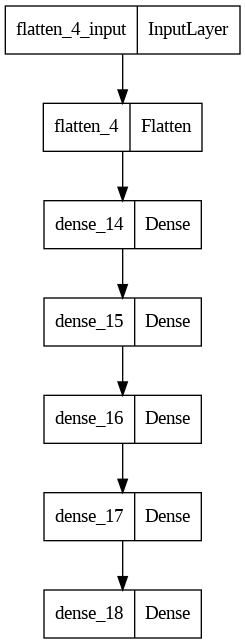

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network for Model 3

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.3318 - accuracy: 0.2002 - val_loss: 2.2887 - val_accuracy: 0.3147
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.2428 - accuracy: 0.4095 - val_loss: 2.1817 - val_accuracy: 0.5348
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 2.1127 - accuracy: 0.5695 - val_loss: 2.0094 - val_accuracy: 0.6372
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.9017 - accuracy: 0.6328 - val_loss: 1.7381 - val_accuracy: 0.6745
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.6065 - accuracy: 0.6753 - val_loss: 1.4058 - val_accuracy: 0.7382
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 1.3022 - accuracy: 0.7370 - val_loss: 1.1115 - val_accuracy: 0.7947
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 1.0612 - accuracy: 0.7794 - val_loss: 0.8982 - val_accuracy: 0.8318
Epoch 

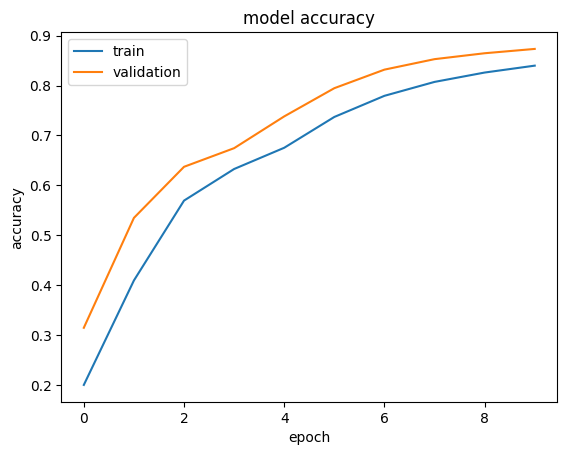

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 3

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.6368 - accuracy: 0.8544


[0.6367853283882141, 0.8543999791145325]

## Define Model 4

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 4

Predicted label:  [[ 0.57639027 -0.63363254  0.11522351  0.33302715  0.2995265  -0.08672434
   0.07968086 -0.12063599  0.14307013 -0.1529688 ]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (1, 784)                  0         
                                                                 
 dense_19 (Dense)            (1, 512)                  401920    
                                                                 
 dense_20 (Dense)            (1, 256)                  131328    
                                                                 
 dense_21 (Dense)            (1, 10)                   2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


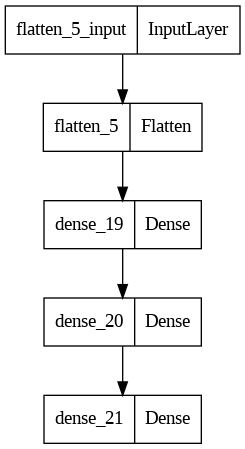

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the Network for Model 4

Epoch 1/10
422/422 [==============================] - 3s 4ms/step - loss: 2.2083 - accuracy: 0.2835 - val_loss: 2.0222 - val_accuracy: 0.5533
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 1.8775 - accuracy: 0.6308 - val_loss: 1.6874 - val_accuracy: 0.7363
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 1.5674 - accuracy: 0.7326 - val_loss: 1.3792 - val_accuracy: 0.7962
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.2990 - accuracy: 0.7765 - val_loss: 1.1287 - val_accuracy: 0.8293
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 1.0919 - accuracy: 0.8046 - val_loss: 0.9445 - val_accuracy: 0.8562
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9422 - accuracy: 0.8231 - val_loss: 0.8135 - val_accuracy: 0.8680
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8354 - accuracy: 0.8362 - val_loss: 0.7201 - val_accuracy: 0.8758
Epoch 

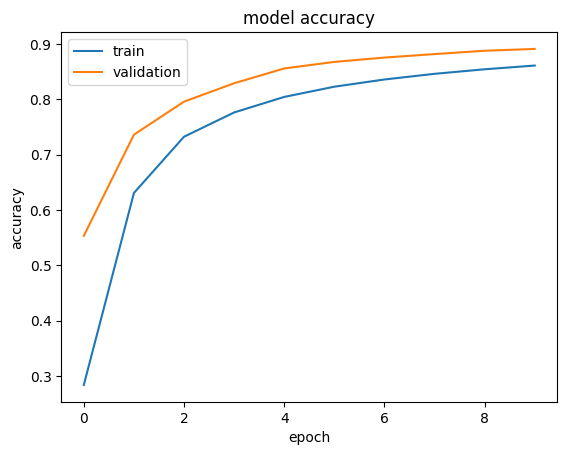

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 4 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.603921115398407, 0.8752999901771545]

## Define Model 5

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 5

Predicted label:  [[ 0.0620892  -0.19707495 -0.08418989  0.00710363  0.43260825 -0.1497715
  -0.11124013 -0.28558978 -0.15810594 -0.47614044]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (1, 784)                  0         
                                                                 
 dense_25 (Dense)            (1, 512)                  401920    
                                                                 
 dense_26 (Dense)            (1, 256)                  131328    
                                                                 
 dense_27 (Dense)            (1, 256)                  65792     
                                                                 
 dense_28 (Dense)            (1, 10)                   2570      
                                                                 
Total params: 601610 (2.29 MB)
Trainable pa

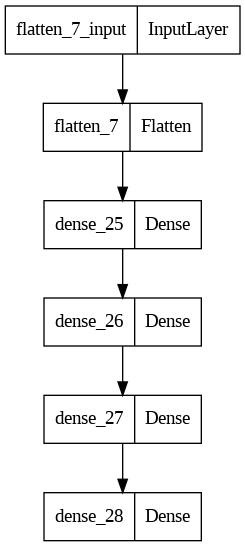

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the Network for Model 5

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.3165 - accuracy: 0.2180 - val_loss: 2.2281 - val_accuracy: 0.3563
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.1460 - accuracy: 0.4523 - val_loss: 2.0401 - val_accuracy: 0.5585
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 1.9366 - accuracy: 0.5944 - val_loss: 1.7904 - val_accuracy: 0.6737
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 1.6693 - accuracy: 0.6814 - val_loss: 1.4889 - val_accuracy: 0.7507
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 1.3816 - accuracy: 0.7420 - val_loss: 1.1988 - val_accuracy: 0.7988
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1340 - accuracy: 0.7832 - val_loss: 0.9731 - val_accuracy: 0.8380
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.9531 - accuracy: 0.8115 - val_loss: 0.8162 - val_accuracy: 0.8588
Epoch 

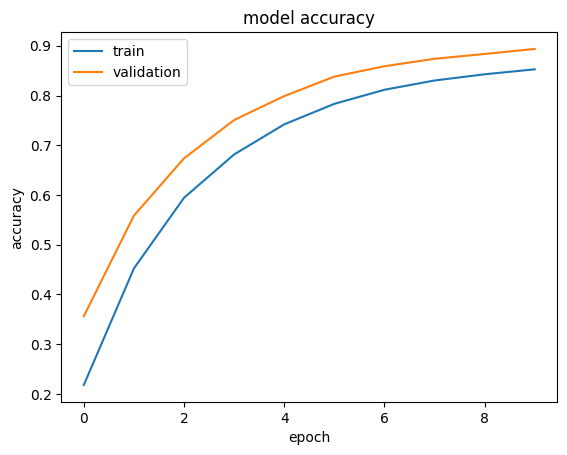

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 5 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.6224629878997803, 0.8694000244140625]

## Define Model 6 on the test dataset

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 6

Predicted label:  [[-0.15457119 -0.1229361   0.06080431  0.29951516 -0.11329068 -0.25164473
  -0.19265616  0.119656   -0.10920681  0.04357843]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (1, 784)                  0         
                                                                 
 dense_29 (Dense)            (1, 512)                  401920    
                                                                 
 dense_30 (Dense)            (1, 256)                  131328    
                                                                 
 dense_31 (Dense)            (1, 256)                  65792     
                                                                 
 dense_32 (Dense)            (1, 256)                  65792     
                                                                 
 dense_33 (Dense)            (1, 10)      

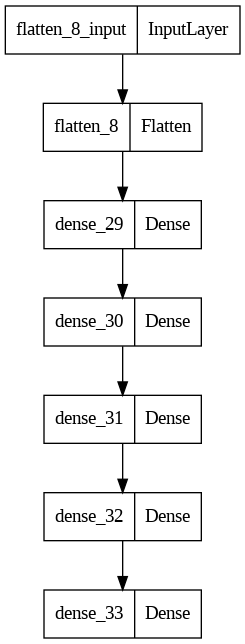

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network for Model 6

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.3232 - accuracy: 0.1466 - val_loss: 2.2696 - val_accuracy: 0.2808
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 2.2165 - accuracy: 0.3838 - val_loss: 2.1332 - val_accuracy: 0.5310
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 2.0526 - accuracy: 0.5622 - val_loss: 1.9197 - val_accuracy: 0.6563
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.8027 - accuracy: 0.6622 - val_loss: 1.6148 - val_accuracy: 0.7208
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.4874 - accuracy: 0.7256 - val_loss: 1.2798 - val_accuracy: 0.7932
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1875 - accuracy: 0.7768 - val_loss: 1.0029 - val_accuracy: 0.8313
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9663 - accuracy: 0.8061 - val_loss: 0.8156 - val_accuracy: 0.8530
Epoch 

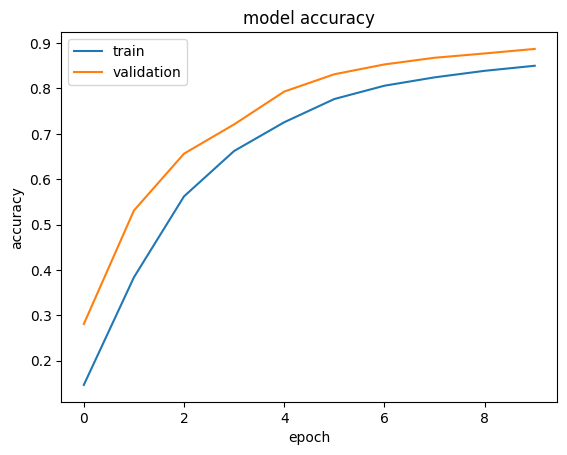

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate model 6 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.6003423929214478, 0.8637999892234802]

## Define Model 7

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 7

Predicted label:  [[ 0.05164701 -0.39275414 -0.10914297 -0.3140064  -0.11075066 -0.13031465
   0.45468685  0.23534411 -0.14286688  0.2507916 ]]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (1, 784)                  0         
                                                                 
 dense_34 (Dense)            (1, 512)                  401920    
                                                                 
 dense_35 (Dense)            (1, 512)                  262656    
                                                                 
 dense_36 (Dense)            (1, 10)                   5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


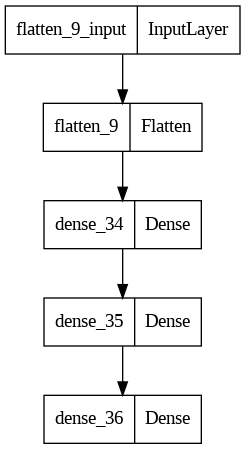

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network on Model 7

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 2.2321 - accuracy: 0.2996 - val_loss: 2.0743 - val_accuracy: 0.5195
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 1.9416 - accuracy: 0.6051 - val_loss: 1.7699 - val_accuracy: 0.7112
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 1.6512 - accuracy: 0.7153 - val_loss: 1.4690 - val_accuracy: 0.7810
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.3802 - accuracy: 0.7635 - val_loss: 1.2072 - val_accuracy: 0.8188
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1595 - accuracy: 0.7953 - val_loss: 1.0073 - val_accuracy: 0.8480
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9968 - accuracy: 0.8148 - val_loss: 0.8639 - val_accuracy: 0.8637
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8802 - accuracy: 0.8294 - val_loss: 0.7616 - val_accuracy: 0.8732
Epoch 

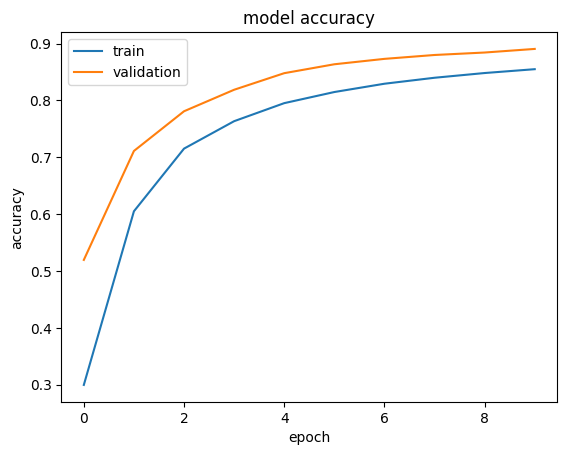

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 7 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.6329637765884399, 0.8695999979972839]

## Define Model 8

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 8

Predicted label:  [[-0.03351434 -0.01774566  0.25798574 -0.13690785 -0.26896992  0.00344986
   0.22909538 -0.10343563  0.30092305  0.0980168 ]]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (1, 784)                  0         
                                                                 
 dense_45 (Dense)            (1, 512)                  401920    
                                                                 
 dense_46 (Dense)            (1, 512)                  262656    
                                                                 
 dense_47 (Dense)            (1, 512)                  262656    
                                                                 
 dense_48 (Dense)            (1, 10)                   5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable 

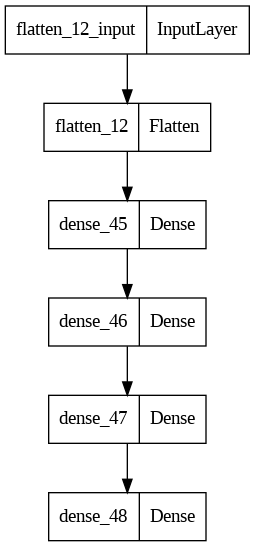

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network for Model 8

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.2834 - accuracy: 0.2563 - val_loss: 2.1835 - val_accuracy: 0.5042
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.0833 - accuracy: 0.5831 - val_loss: 1.9516 - val_accuracy: 0.6802
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 1.8288 - accuracy: 0.6789 - val_loss: 1.6558 - val_accuracy: 0.7435
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.5289 - accuracy: 0.7239 - val_loss: 1.3380 - val_accuracy: 0.7848
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.2455 - accuracy: 0.7622 - val_loss: 1.0715 - val_accuracy: 0.8198
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 1.0288 - accuracy: 0.7946 - val_loss: 0.8824 - val_accuracy: 0.8463
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.8791 - accuracy: 0.8175 - val_loss: 0.7531 - val_accuracy: 0.8612
Epoch 

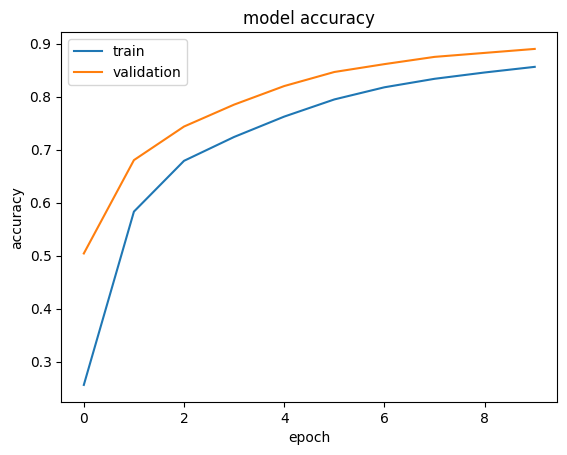

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 8 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.5945820808410645, 0.8676000237464905]

## Define Model 9

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

## Explore Model 9

Predicted label:  [[ 0.00779386  0.00140647 -0.13779071 -0.02356667 -0.09742031 -0.21437475
  -0.28100595 -0.0860744  -0.04773848  0.0230523 ]]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (1, 784)                  0         
                                                                 
 dense_54 (Dense)            (1, 512)                  401920    
                                                                 
 dense_55 (Dense)            (1, 512)                  262656    
                                                                 
 dense_56 (Dense)            (1, 512)                  262656    
                                                                 
 dense_57 (Dense)            (1, 512)                  262656    
                                                                 
 dense_58 (Dense)            (1, 10)     

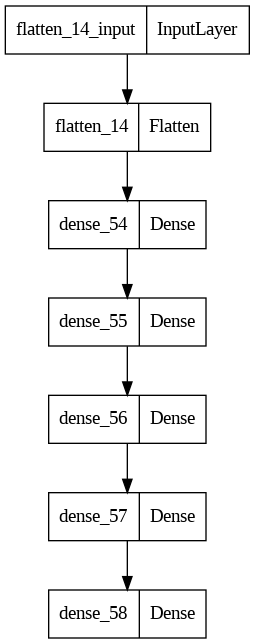

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

## Train the network for Model 9

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 2.3218 - accuracy: 0.2347 - val_loss: 2.2644 - val_accuracy: 0.3770
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 2.2089 - accuracy: 0.4421 - val_loss: 2.1298 - val_accuracy: 0.5573
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 2.0488 - accuracy: 0.6058 - val_loss: 1.9227 - val_accuracy: 0.7005
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 1.7995 - accuracy: 0.7048 - val_loss: 1.6108 - val_accuracy: 0.7563
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 1.4695 - accuracy: 0.7506 - val_loss: 1.2550 - val_accuracy: 0.8097
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1585 - accuracy: 0.7864 - val_loss: 0.9752 - val_accuracy: 0.8373
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9401 - accuracy: 0.8122 - val_loss: 0.7948 - val_accuracy: 0.8587
Epoch 

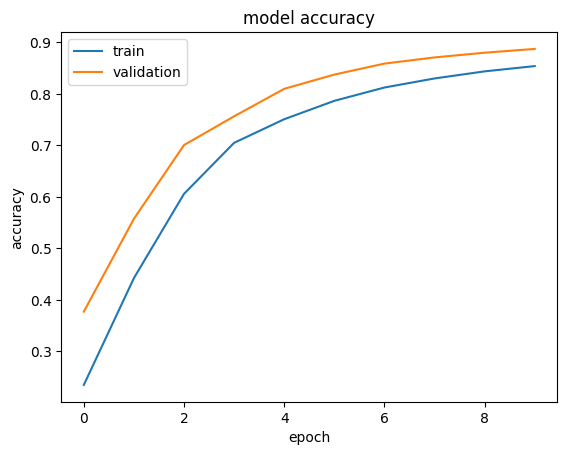

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate Model 9 on the test dataset

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.5879414081573486, 0.866100013256073]

## Description of results from first table

I found that the best performance came from a network with 4 dense layers with 128 nodes in each hidden layer. Based on the description from the assignment, I used the same number of nodes in each hidden layer rather than experimenting with mixing different numbers of nodes in the hidden layers.

## Experimenting with different optimizers and learning rates

Define a model based on Model 2 above since it had the best performance

The first model for table 2 uses the SGD optimizer with a learning rate of 0.01

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.0609266   0.29454485 -0.1760123   0.06695193  0.26534522  0.09573583
   0.12858339  0.24664819 -0.17822611 -0.24578018]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (1, 784)                  0         
                                                                 
 dense (Dense)               (1, 512)                  401920    
                                                                 
 dense_1 (Dense)             (1, 128)                  65664     
                                                                 
 dense_2 (Dense)             (1, 128)                  16512     
                                                                 
 dense_3 (Dense)             (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable par

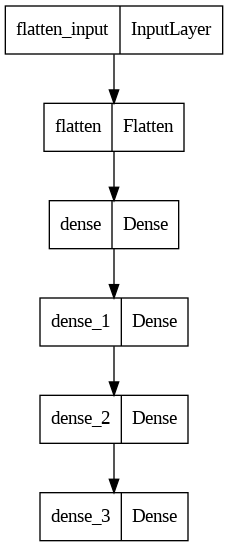

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Train the network

Epoch 1/10
422/422 [==============================] - 4s 5ms/step - loss: 1.3587 - accuracy: 0.6789 - val_loss: 0.5803 - val_accuracy: 0.8825
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.5314 - accuracy: 0.8746 - val_loss: 0.3848 - val_accuracy: 0.9133
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.4206 - accuracy: 0.8984 - val_loss: 0.3319 - val_accuracy: 0.9282
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3741 - accuracy: 0.9109 - val_loss: 0.3059 - val_accuracy: 0.9328
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3440 - accuracy: 0.9192 - val_loss: 0.2826 - val_accuracy: 0.9393
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3214 - accuracy: 0.9259 - val_loss: 0.2666 - val_accuracy: 0.9428
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.9308 - val_loss: 0.2560 - val_accuracy: 0.9455
Epoch 

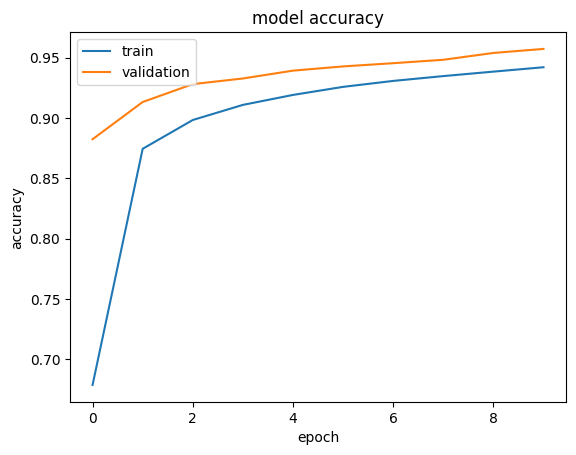

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Evaluate the model

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.2525513172149658, 0.944599986076355]

The 2nd model for table 2 uses the SGD optimizer with a learning rate of 0.005

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.23091015 -0.2635426   0.45705932  0.24896152 -0.07437686  0.27263847
  -0.08860962  0.2804569   0.20685112  0.27751034]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (1, 784)                  0         
                                                                 
 dense_4 (Dense)             (1, 512)                  401920    
                                                                 
 dense_5 (Dense)             (1, 128)                  65664     
                                                                 
 dense_6 (Dense)             (1, 128)                  16512     
                                                                 
 dense_7 (Dense)             (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

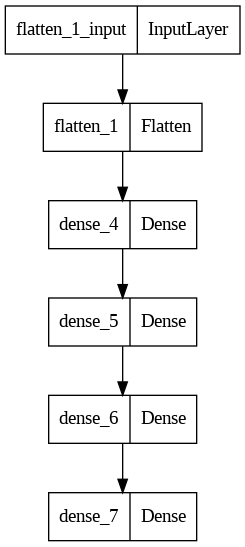

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 1.7893 - accuracy: 0.5725 - val_loss: 1.0554 - val_accuracy: 0.8235
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8097 - accuracy: 0.8261 - val_loss: 0.5550 - val_accuracy: 0.8937
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5574 - accuracy: 0.8722 - val_loss: 0.4258 - val_accuracy: 0.9098
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.4686 - accuracy: 0.8894 - val_loss: 0.3719 - val_accuracy: 0.9202
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.4223 - accuracy: 0.8996 - val_loss: 0.3422 - val_accuracy: 0.9248
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3930 - accuracy: 0.9070 - val_loss: 0.3207 - val_accuracy: 0.9282
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3716 - accuracy: 0.9121 - val_loss: 0.3059 - val_accuracy: 0.9320
Epoch 

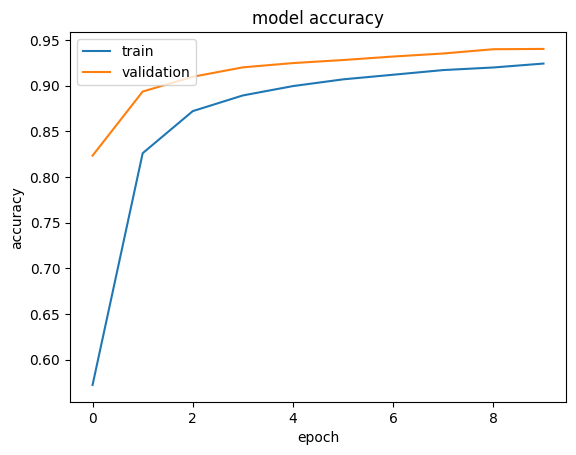

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.005, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.3106047511100769, 0.9289000034332275]

For the 3rd model, use SGD and a learning rate of 0.02

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[-0.17854348 -0.13152927 -0.21268076 -0.24290001 -0.06142601 -0.01083858
  -0.18250753  0.1037073   0.14544177 -0.35922784]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (1, 784)                  0         
                                                                 
 dense_8 (Dense)             (1, 512)                  401920    
                                                                 
 dense_9 (Dense)             (1, 128)                  65664     
                                                                 
 dense_10 (Dense)            (1, 128)                  16512     
                                                                 
 dense_11 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

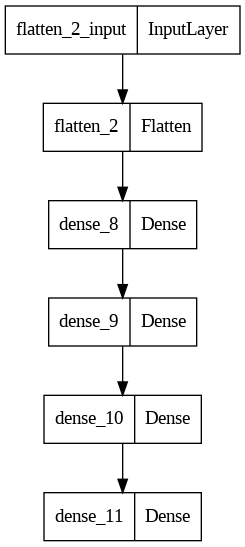

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 1.8651 - accuracy: 0.5483 - val_loss: 1.1509 - val_accuracy: 0.8048
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.8493 - accuracy: 0.8188 - val_loss: 0.5710 - val_accuracy: 0.8847
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5656 - accuracy: 0.8671 - val_loss: 0.4354 - val_accuracy: 0.9058
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4737 - accuracy: 0.8872 - val_loss: 0.3790 - val_accuracy: 0.9165
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4269 - accuracy: 0.8973 - val_loss: 0.3497 - val_accuracy: 0.9223
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3974 - accuracy: 0.9047 - val_loss: 0.3271 - val_accuracy: 0.9270
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.9112 - val_loss: 0.3116 - val_accuracy: 0.9337
Epoch 

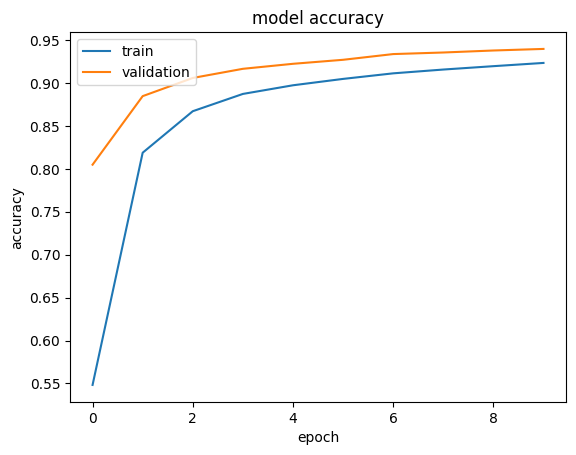

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.SGD(learning_rate=0.005, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.3147013783454895, 0.9275000095367432]

## Now, I'm going to go through the same learning rates using the Adam optimizer

Adam with LR = 0.01

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.03833829  0.00480326  0.2477316   0.26355866  0.03568747 -0.0310881
   0.26285517 -0.38255566 -0.03015218  0.05082265]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (1, 784)                  0         
                                                                 
 dense_16 (Dense)            (1, 512)                  401920    
                                                                 
 dense_17 (Dense)            (1, 128)                  65664     
                                                                 
 dense_18 (Dense)            (1, 128)                  16512     
                                                                 
 dense_19 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable pa

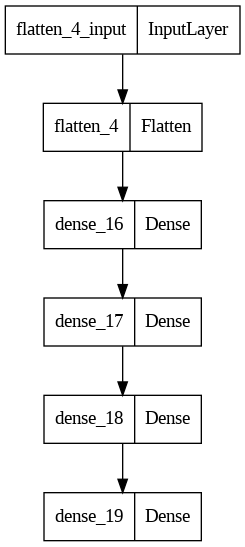

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.3777 - accuracy: 0.9144 - val_loss: 0.2519 - val_accuracy: 0.9537
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2633 - accuracy: 0.9526 - val_loss: 0.2230 - val_accuracy: 0.9658
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2500 - accuracy: 0.9574 - val_loss: 0.2382 - val_accuracy: 0.9623
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2418 - accuracy: 0.9599 - val_loss: 0.2360 - val_accuracy: 0.9637
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2329 - accuracy: 0.9609 - val_loss: 0.2463 - val_accuracy: 0.9593
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2357 - accuracy: 0.9617 - val_loss: 0.2108 - val_accuracy: 0.9662
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2293 - accuracy: 0.9616 - val_loss: 0.2344 - val_accuracy: 0.9620
Epoch 

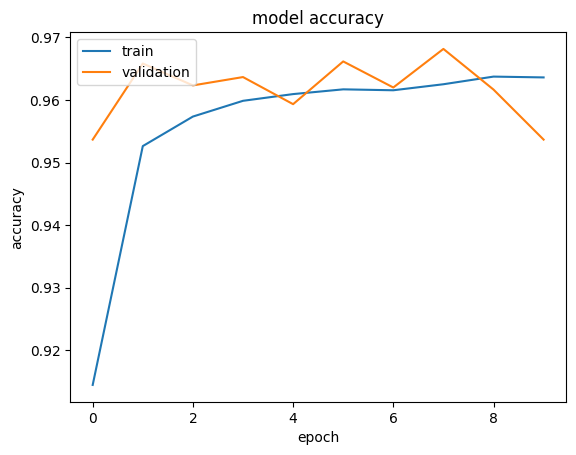

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.Adam(learning_rate=0.01, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.275955468416214, 0.949999988079071]

Adam with LR = 0.005

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[-0.12068634  0.16531661 -0.18090694 -0.13263756 -0.3988724   0.41163012
  -0.28212482 -0.3437659   0.4977003  -0.31285077]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (1, 784)                  0         
                                                                 
 dense_20 (Dense)            (1, 512)                  401920    
                                                                 
 dense_21 (Dense)            (1, 128)                  65664     
                                                                 
 dense_22 (Dense)            (1, 128)                  16512     
                                                                 
 dense_23 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

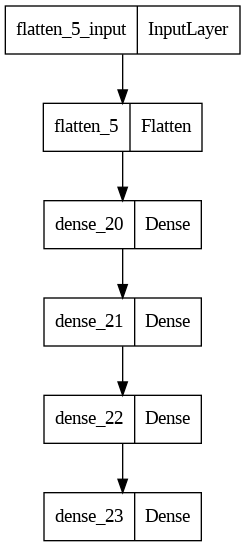

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 5s 6ms/step - loss: 0.3097 - accuracy: 0.9260 - val_loss: 0.2023 - val_accuracy: 0.9607
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2075 - accuracy: 0.9621 - val_loss: 0.1907 - val_accuracy: 0.9683
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1892 - accuracy: 0.9680 - val_loss: 0.1854 - val_accuracy: 0.9688
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1790 - accuracy: 0.9707 - val_loss: 0.1988 - val_accuracy: 0.9690
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1701 - accuracy: 0.9728 - val_loss: 0.1727 - val_accuracy: 0.9728
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1651 - accuracy: 0.9739 - val_loss: 0.1697 - val_accuracy: 0.9742
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1581 - accuracy: 0.9752 - val_loss: 0.1659 - val_accuracy: 0.9758
Epoch 

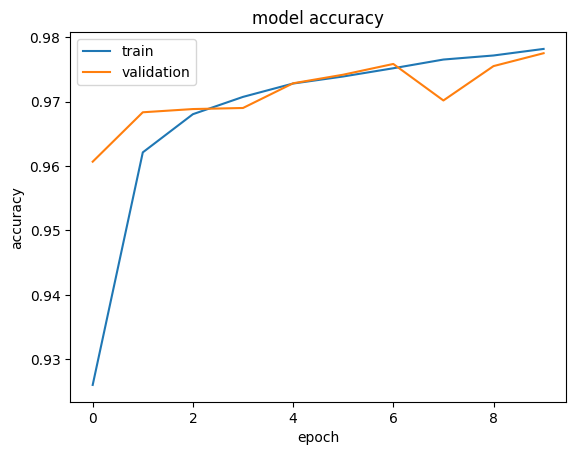

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.Adam(learning_rate=0.005, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.16673848032951355, 0.9718000292778015]

Adam with LR = 0.02

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.12484804 -0.15385659 -0.4298016  -0.05608249 -0.10981172  0.26699978
   0.48653054  0.1485359   0.00421809 -0.08367208]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (1, 784)                  0         
                                                                 
 dense_24 (Dense)            (1, 512)                  401920    
                                                                 
 dense_25 (Dense)            (1, 128)                  65664     
                                                                 
 dense_26 (Dense)            (1, 128)                  16512     
                                                                 
 dense_27 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

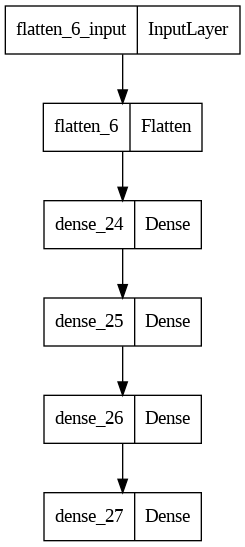

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.5147 - accuracy: 0.9005 - val_loss: 0.3069 - val_accuracy: 0.9525
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3760 - accuracy: 0.9343 - val_loss: 0.3114 - val_accuracy: 0.9547
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3740 - accuracy: 0.9373 - val_loss: 0.2970 - val_accuracy: 0.9578
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.9414 - val_loss: 0.2902 - val_accuracy: 0.9585
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3540 - accuracy: 0.9412 - val_loss: 0.3203 - val_accuracy: 0.9468
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.9423 - val_loss: 0.3108 - val_accuracy: 0.9557
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3354 - accuracy: 0.9452 - val_loss: 0.3452 - val_accuracy: 0.9432
Epoch 

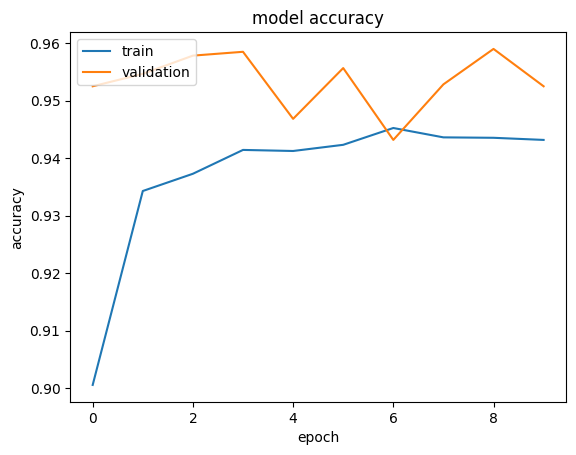

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.Adam(learning_rate=0.02, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.3222666382789612, 0.9514999985694885]

## Next, try RMSProp

RMSProp with LR = 0.01

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[-0.2235594  -0.09325342 -0.17156184 -0.21910185  0.09529884 -0.02575605
   0.07874768  0.0111509  -0.15915982 -0.33484173]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (1, 784)                  0         
                                                                 
 dense_28 (Dense)            (1, 512)                  401920    
                                                                 
 dense_29 (Dense)            (1, 128)                  65664     
                                                                 
 dense_30 (Dense)            (1, 128)                  16512     
                                                                 
 dense_31 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

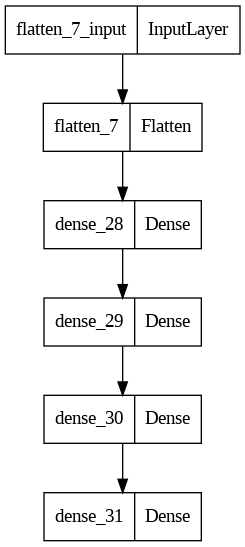

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.5603 - accuracy: 0.8761 - val_loss: 0.2902 - val_accuracy: 0.9423
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2741 - accuracy: 0.9432 - val_loss: 0.2201 - val_accuracy: 0.9580
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2648 - accuracy: 0.9499 - val_loss: 0.2144 - val_accuracy: 0.9600
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2670 - accuracy: 0.9519 - val_loss: 0.2726 - val_accuracy: 0.9537
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2652 - accuracy: 0.9521 - val_loss: 0.2407 - val_accuracy: 0.9547
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2701 - accuracy: 0.9530 - val_loss: 0.3127 - val_accuracy: 0.9570
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2706 - accuracy: 0.9515 - val_loss: 0.2931 - val_accuracy: 0.9527
Epoch 

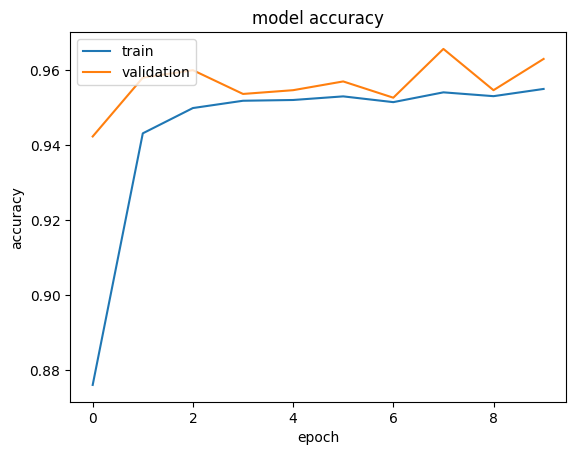

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.27957484126091003, 0.9549000263214111]

RMSProp with LR = 0.005

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.05036499 -0.02533436 -0.00074361  0.04095225  0.12028891  0.3178701
   0.18834558  0.11754037 -0.08752933  0.09128577]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (1, 784)                  0         
                                                                 
 dense_32 (Dense)            (1, 512)                  401920    
                                                                 
 dense_33 (Dense)            (1, 128)                  65664     
                                                                 
 dense_34 (Dense)            (1, 128)                  16512     
                                                                 
 dense_35 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable pa

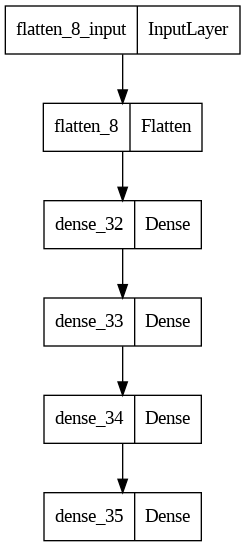

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.4068 - accuracy: 0.8968 - val_loss: 0.1798 - val_accuracy: 0.9643
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2071 - accuracy: 0.9569 - val_loss: 0.1719 - val_accuracy: 0.9688
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1854 - accuracy: 0.9639 - val_loss: 0.3156 - val_accuracy: 0.9283
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1757 - accuracy: 0.9680 - val_loss: 0.1883 - val_accuracy: 0.9673
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9691 - val_loss: 0.1516 - val_accuracy: 0.9740
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1699 - accuracy: 0.9692 - val_loss: 0.1502 - val_accuracy: 0.9708
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1673 - accuracy: 0.9696 - val_loss: 0.1800 - val_accuracy: 0.9707
Epoch 

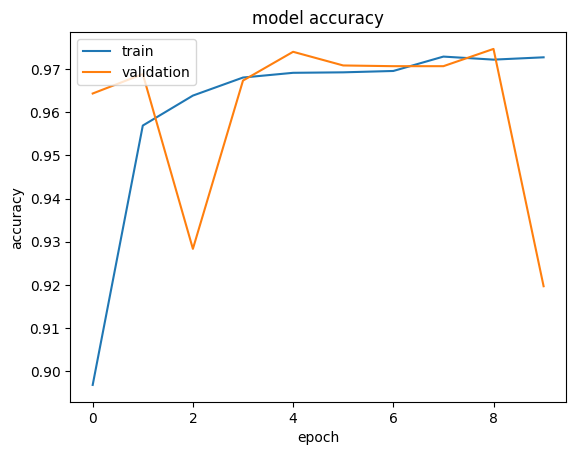

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.RMSprop(learning_rate=0.005, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.806158721446991, 0.8967999815940857]

RMSProp with LR = 0.02

In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.00148547 -0.38429713  0.521514   -0.17796184  0.35539827 -0.33406654
  -0.4487914  -0.03049665 -0.24958853  0.15803277]]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (1, 784)                  0         
                                                                 
 dense_36 (Dense)            (1, 512)                  401920    
                                                                 
 dense_37 (Dense)            (1, 128)                  65664     
                                                                 
 dense_38 (Dense)            (1, 128)                  16512     
                                                                 
 dense_39 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable p

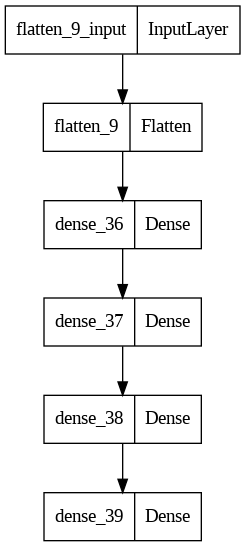

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.4185 - accuracy: 0.8963 - val_loss: 0.1982 - val_accuracy: 0.9585
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2075 - accuracy: 0.9580 - val_loss: 0.2085 - val_accuracy: 0.9543
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.1857 - accuracy: 0.9656 - val_loss: 0.1783 - val_accuracy: 0.9702
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1807 - accuracy: 0.9660 - val_loss: 0.1661 - val_accuracy: 0.9732
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1795 - accuracy: 0.9675 - val_loss: 0.1951 - val_accuracy: 0.9695
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9694 - val_loss: 0.1773 - val_accuracy: 0.9722
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1710 - accuracy: 0.9702 - val_loss: 0.1836 - val_accuracy: 0.9740
Epoch 

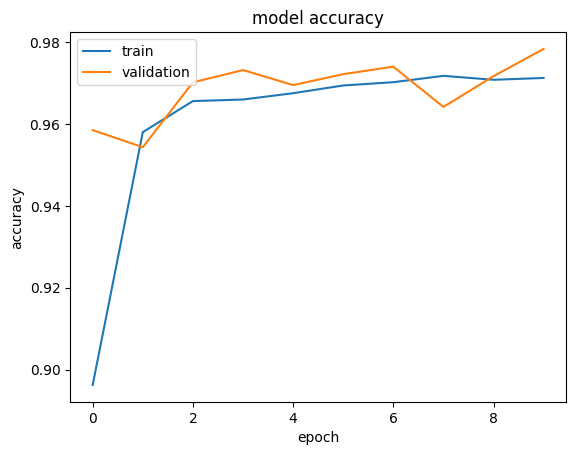

In [ ]:
batch_size = 128
epochs = 10
opt=keras.optimizers.RMSprop(learning_rate=0.005, momentum=0.0, weight_decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,  y_test_categorical, verbose=0)

[0.18056492507457733, 0.9725000262260437]

## Question 2

Training set: the first 5,000 of the original 60,000 training images; Testing set: same as the original testing set.


Import the the data described above.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Extract the first 5,000 images for training
num_samples = 5000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("labels for the first five examples: \n", y_train[0:5])

# convert index labels to one-hot encoding labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("one-hot labels for the first five examples: \n", y_train[0:5])

x_train shape: (5000, 28, 28)
5000 train samples
10000 test samples
labels for the first five examples: 
 [5 0 4 1 9]
one-hot labels for the first five examples: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[-0.10293666  0.2906912  -0.27641562  0.13729481  0.2062032   0.09365997
  -0.15259834 -0.0850475  -0.11649875 -0.39354712]]
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (1, 784)                  0         
                                                                 
 dense_155 (Dense)           (1, 512)                  401920    
                                                                 
 dense_156 (Dense)           (1, 128)                  65664     
                                                                 
 dense_157 (Dense)           (1, 10)                   1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


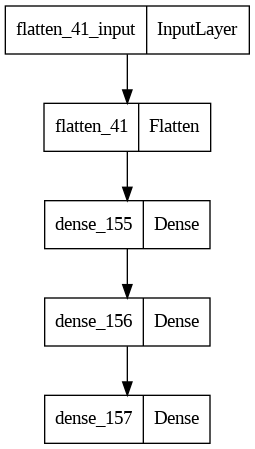

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/27
141/141 [==============================] - 1s 5ms/step - loss: 1.2305 - accuracy: 0.7051 - val_loss: 0.6567 - val_accuracy: 0.8480
Epoch 2/27
141/141 [==============================] - 1s 4ms/step - loss: 0.5181 - accuracy: 0.8829 - val_loss: 0.4747 - val_accuracy: 0.8760
Epoch 3/27
141/141 [==============================] - 0s 4ms/step - loss: 0.4032 - accuracy: 0.9109 - val_loss: 0.4149 - val_accuracy: 0.8920
Epoch 4/27
141/141 [==============================] - 1s 4ms/step - loss: 0.3483 - accuracy: 0.9222 - val_loss: 0.3804 - val_accuracy: 0.8980
Epoch 5/27
141/141 [==============================] - 1s 4ms/step - loss: 0.3090 - accuracy: 0.9342 - val_loss: 0.3453 - val_accuracy: 0.9100
Epoch 6/27
141/141 [==============================] - 1s 4ms/step - loss: 0.2807 - accuracy: 0.9424 - val_loss: 0.3320 - val_accuracy: 0.9180
Epoch 7/27
141/141 [==============================] - 1s 4ms/step - loss: 0.2574 - accuracy: 0.9480 - val_loss: 0.3222 - val_accuracy: 0.9260
Epoch 

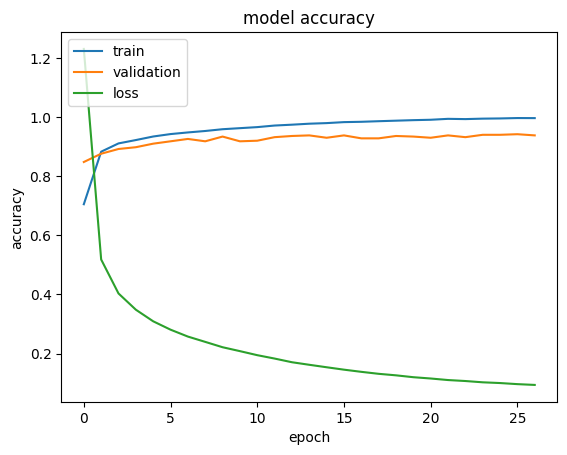

In [ ]:
batch_size = 32
epochs = 27
opt=keras.optimizers.SGD(learning_rate=0.03, weight_decay=0.00)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'loss'], loc='upper left')
plt.show()

In [ ]:
[test_loss, test_accuracy] = model.evaluate(x_test,  y_test_categorical, verbose=0)

In [ ]:
num_params = np.sum([np.prod(var.shape) for var in model.trainable_variables])
tenth_root_params = num_params ** (1/10)

r = test_accuracy / tenth_root_params

print("Test Accuracy: ", test_accuracy)
print("Number of Parameters: ", num_params)
print("Tenth Root of Parameters: ", tenth_root_params)
print("Ratio 'r': ", r)

Test Accuracy:  0.9329000115394592
Number of Parameters:  468874
Tenth Root of Parameters:  3.6906734030788586
Ratio 'r':  0.2527723018680572


Training set: the first 1,000 of the original 60,000 training images; Testing set: same as the original testing set.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Extract the first 5,000 images for training
num_samples = 1000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 - 0.5
x_test = x_test.astype("float32") / 255 - 0.5

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("labels for the first five examples: \n", y_train[0:5])

# convert index labels to one-hot encoding labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("one-hot labels for the first five examples: \n", y_train[0:5])

x_train shape: (1000, 28, 28)
1000 train samples
10000 test samples
labels for the first five examples: 
 [5 0 4 1 9]
one-hot labels for the first five examples: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(256, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    # tf.keras.layers.Dropout(.5, input_shape=(2,)),
    # tf.keras.layers.Dense(70, activation=tf.nn.relu, kernel_initializer=initializer),
    # tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[0.10505165 0.08157629 0.04631585 0.07951818 0.13114001 0.16952367
  0.12243405 0.08884024 0.08733946 0.0882606 ]]
Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_150 (Flatten)       (1, 784)                  0         
                                                                 
 dense_549 (Dense)           (1, 256)                  200960    
                                                                 
 dense_550 (Dense)           (1, 128)                  32896     
                                                                 
 dense_551 (Dense)           (1, 10)                   1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


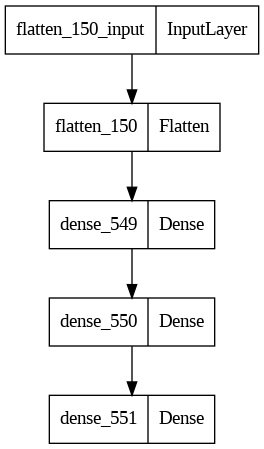

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/17
113/113 [==============================] - 2s 5ms/step - loss: 2.0260 - accuracy: 0.4433 - val_loss: 1.7862 - val_accuracy: 0.5100
Epoch 2/17
113/113 [==============================] - 0s 4ms/step - loss: 1.3692 - accuracy: 0.7278 - val_loss: 1.2775 - val_accuracy: 0.7000
Epoch 3/17
113/113 [==============================] - 0s 4ms/step - loss: 0.9343 - accuracy: 0.7956 - val_loss: 0.9786 - val_accuracy: 0.7600
Epoch 4/17
113/113 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.8322 - val_loss: 0.8324 - val_accuracy: 0.7800
Epoch 5/17
113/113 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.8444 - val_loss: 0.7318 - val_accuracy: 0.8200
Epoch 6/17
113/113 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.8711 - val_loss: 0.7134 - val_accuracy: 0.8400
Epoch 7/17
113/113 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8844 - val_loss: 0.6644 - val_accuracy: 0.8400
Epoch 

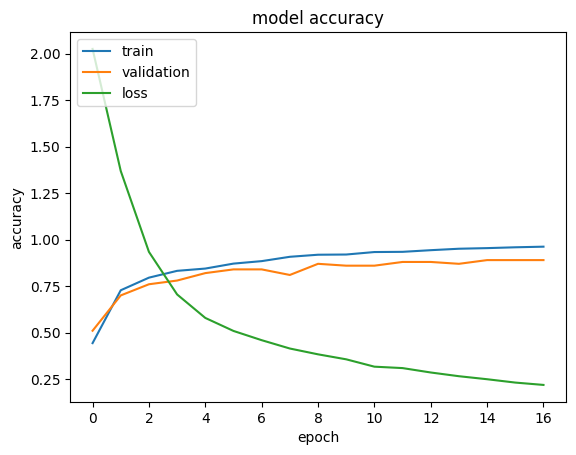

In [ ]:
batch_size = 8
epochs = 17
opt=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.99, beta_2=0.999, weight_decay=0.00002)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'loss'], loc='upper left')
plt.show()

In [ ]:
[test_loss, test_accuracy] = model.evaluate(x_test,  y_test_categorical, verbose=0)

In [ ]:
num_params = np.sum([np.prod(var.shape) for var in model.trainable_variables])
tenth_root_params = num_params ** (1/10)

r = test_accuracy / tenth_root_params

print("Test Accuracy: ", test_accuracy)
print("Number of Parameters: ", num_params)
print("Tenth Root of Parameters: ", tenth_root_params)
print("Ratio 'r': ", r)

Test Accuracy:  0.8622000217437744
Number of Parameters:  235146
Tenth Root of Parameters:  3.444560043772347
Ratio 'r':  0.25030773474325235


Full MNIST dataset with 765 added to all pixel values and divided by 4

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = ((765 + x_train.astype("float32"))/ 4) / 255
x_test = ((765 + x_test.astype("float32")) / 4) / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("labels for the first five examples: \n", y_train[0:5])

# convert index labels to one-hot encoding labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("one-hot labels for the first five examples: \n", y_train[0:5])

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
labels for the first five examples: 
 [5 0 4 1 9]
one-hot labels for the first five examples: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
initializer = tf.keras.initializers.GlorotUniform
regularizer=tf.keras.regularizers.L2(0.0001)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # converts 28x28 image to a 784 vector
    tf.keras.layers.Dense(512, activation=tf.nn.relu,
                          kernel_initializer=initializer, kernel_regularizer=regularizer),
    # You may add a dropout to this layer by adding a dropout layer as below
    # tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation=None, kernel_initializer=initializer)
    # This output is z without softmax. It's called logits.
    # you could also use an output layer with softmax activation as in below
    # In that case, your definition of loss will include from_logits=False
    # tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

Predicted label:  [[ 0.38609916  1.0324696   2.194364    0.1491313   0.92488396 -0.6906678
   0.9837772  -2.4635262  -0.7038333  -0.24921162]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (1, 784)                  0         
                                                                 
 dense_9 (Dense)             (1, 512)                  401920    
                                                                 
 dense_10 (Dense)            (1, 128)                  65664     
                                                                 
 dense_11 (Dense)            (1, 10)                   1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


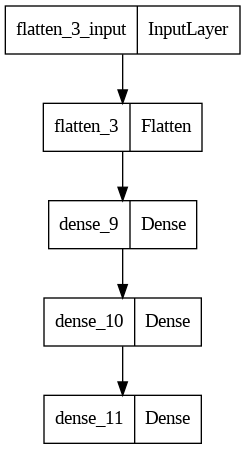

In [ ]:
# Pass one sample x_train[0]. First reshape it to (1,28,28)
sample_image = np.expand_dims(x_train[0], 0)
print('Predicted label: ', model(sample_image).numpy())

# You can only call model.summary() once you pass something through the model
model.summary()
# or plot the model
keras.utils.plot_model(model, "fully_connected.png")

Epoch 1/27
1688/1688 [==============================] - 13s 7ms/step - loss: 2.0105 - accuracy: 0.3020 - val_loss: 1.4984 - val_accuracy: 0.4975
Epoch 2/27
1688/1688 [==============================] - 8s 4ms/step - loss: 1.5633 - accuracy: 0.4930 - val_loss: 1.2097 - val_accuracy: 0.5917
Epoch 3/27
1688/1688 [==============================] - 7s 4ms/step - loss: 1.1841 - accuracy: 0.6215 - val_loss: 0.8263 - val_accuracy: 0.7113
Epoch 4/27
1688/1688 [==============================] - 8s 5ms/step - loss: 0.9066 - accuracy: 0.7262 - val_loss: 1.7526 - val_accuracy: 0.4585
Epoch 5/27
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6955 - accuracy: 0.7988 - val_loss: 0.5255 - val_accuracy: 0.8513
Epoch 6/27
1688/1688 [==============================] - 8s 5ms/step - loss: 0.6285 - accuracy: 0.8231 - val_loss: 0.4190 - val_accuracy: 0.8967
Epoch 7/27
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5491 - accuracy: 0.8485 - val_loss: 0.4052 - val_accuracy

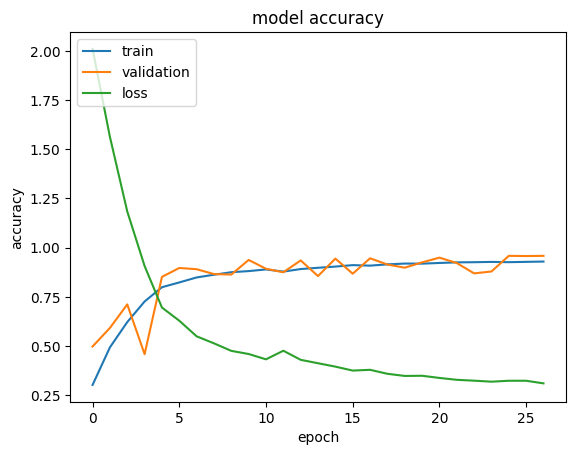

In [ ]:
batch_size = 32
epochs = 27
opt=keras.optimizers.SGD(learning_rate=0.03, momentum=0.00, weight_decay=0.000)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=["accuracy"],
)
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'loss'], loc='upper left')
plt.show()

In [ ]:
[test_loss, test_accuracy] = model.evaluate(x_test,  y_test_categorical, verbose=0)

In [ ]:
num_params = np.sum([np.prod(var.shape) for var in model.trainable_variables])
tenth_root_params = num_params ** (1/10)

r = test_accuracy / tenth_root_params

print("Test Accuracy: ", test_accuracy)
print("Number of Parameters: ", num_params)
print("Tenth Root of Parameters: ", tenth_root_params)
print("Ratio 'r': ", r)

Test Accuracy:  0.9474999904632568
Number of Parameters:  468874
Tenth Root of Parameters:  3.6906734030788586
Ratio 'r':  0.2567282137923196
